In [ ]:
import tensorflow.keras.layers as Layers
import tensorflow.keras.activations as Actications
import tensorflow.keras.models as Models
import tensorflow.keras.optimizers as Optimizer
import tensorflow.keras.metrics as Metrics
import tensorflow.keras.utils as Utils
from keras.utils.vis_utils import model_to_dot
import os
import matplotlib.pyplot as plot
import cv2
import numpy as np
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix as CM
from random import randint
from IPython.display import SVG
import matplotlib.gridspec as gridspec
import tensorflow as tf


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/kaggle"
%cd /content/drive/MyDrive/kaggle/
#!kaggle competitions download -c state-farm-distracted-driver-detection

/content/drive/MyDrive/kaggle


In [ ]:
!unzip /content/drive/MyDrive/kaggle/state-farm-distracted-driver-detection.zip
img_height,img_width=150,150

Streaming output truncated to the last 5000 lines.
  inflating: imgs/train/c6/img_86740.jpg  
  inflating: imgs/train/c6/img_86769.jpg  
  inflating: imgs/train/c6/img_86803.jpg  
  inflating: imgs/train/c6/img_86869.jpg  
  inflating: imgs/train/c6/img_87017.jpg  
  inflating: imgs/train/c6/img_87034.jpg  
  inflating: imgs/train/c6/img_87158.jpg  
  inflating: imgs/train/c6/img_8716.jpg  
  inflating: imgs/train/c6/img_87165.jpg  
  inflating: imgs/train/c6/img_87168.jpg  
  inflating: imgs/train/c6/img_87341.jpg  
  inflating: imgs/train/c6/img_8736.jpg  
  inflating: imgs/train/c6/img_87360.jpg  
  inflating: imgs/train/c6/img_875.jpg  
  inflating: imgs/train/c6/img_87505.jpg  
  inflating: imgs/train/c6/img_87601.jpg  
  inflating: imgs/train/c6/img_87651.jpg  
  inflating: imgs/train/c6/img_8779.jpg  
  inflating: imgs/train/c6/img_879.jpg  
  inflating: imgs/train/c6/img_87902.jpg  
  inflating: imgs/train/c6/img_87915.jpg  
  inflating: imgs/train/c6/img_87939.jpg  
  inflatin

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_data_dir="/content/drive/MyDrive/kaggle/imgs/train"
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2) # set validation split
batch_size=100
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    #class_mode='binary',
    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    train_data_dir, # same directory as training data
    target_size=(img_height, img_width),
    batch_size=batch_size,
    #class_mode='binary',
    subset='validation') # set as validation data

Found 13975 images belonging to 10 classes.
Found 3487 images belonging to 10 classes.


In [ ]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/kaggle/driver_imgs_list.csv")
df.head()

,subject,classname,img
0,p012,c0,img_10206.jpg
1,p012,c0,img_27079.jpg
2,p012,c0,img_50749.jpg
3,p012,c0,img_97089.jpg
4,p012,c0,img_37741.jpg


In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
def get_data(path):
    image_data=[]
    for j in os.listdir(path):
          im=load_img(path+"/"+j,target_size=(150,150))
          im=img_to_array(im)
          im=im/255
          image_data.append(im)
    return np.array(image_data),image_data
image_data_array,image_data=get_data("/content/drive/MyDrive/kaggle/imgs/test")

In [ ]:
Execution_Time_Moitor=[]

['c0', 'c4', 'c6', 'c3', 'c5', 'c2', 'c1', 'c9', 'c7', 'c8']


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


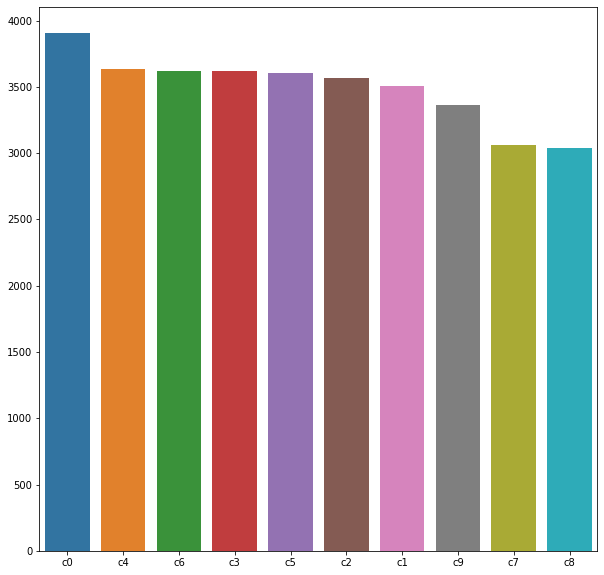

In [ ]:
#seeing how each class is distributed
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
x=df.classname.value_counts().index.values.tolist()
print(x)
y=df.classname.value_counts().values.tolist()
sns.barplot(x,y)

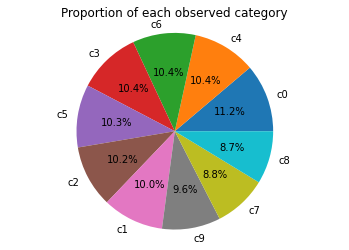

In [ ]:
#Pie chart
plt.pie(y,
        explode=(0, 0, 0, 0, 0, 0,0 ,0,0,0) ,
        labels=x,
        autopct='%1.1f%%')
plt.axis('equal')
plt.title('Proportion of each observed category')
plt.show()

In [ ]:
class_names = train_ds.class_names
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for images,labels in train_ds.take(1):
    for i in range(9):
      plt.figure(figsize=(10,10))
      plt.imshow(images[i].numpy().astype("uint8"))
      plt.title(class_names[labels[i]])
      plt.axis("off")
    plt.show()

NameError: ignored

In [ ]:
for image_batch,labels_batch in train_generator:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

In [ ]:
for image_batch,labels_batch in validation_generator:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

In [ ]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

#Now the data looks fine so we will build our own model first and chect the accuracy and performance.

## CNN Model

Our CNN model has a similar architecture in dealing with every problem:

1.Input image passing.

2.Convolution Layer.

3.Pooling Layer.

4.Convolution Layer.

5.Pooling Layer.

6.Fully Connected Layer.

7.Output Layer.



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D,Dropout,Dense,Flatten
my_model1=Sequential()
#The sequential API allows you to create models layer-by-layer for most problems.
#It is limited in that it does not allow you to create models that share layers or have multiple inputs or outputs.
#Keras Conv2D is a 2D Convolution Layer, this layer creates a convolution kernel that is wind with layers
#input which helps produce a tensor of outputs.
#Dilution (also called Dropout or DropConnect) is a regularization technique for reducing overfitting in artificial neural networks by preventing complex co-adaptations on training data.
#It is an efficient way of performing model averaging with neural networks. The term dilution refers to the thinning of the weights.
#Maximum pooling, or max pooling, is a pooling operation that calculates the maximum, or largest, value in each patch of each feature map.
#The results are down sampled or pooled feature maps that highlight the most present feature in the patch, not the average presence of the feature in the case of average pooling.

my_model1=tf.keras.Sequential([
tf.keras.layers.Conv2D(150,kernel_size=(3,3),activation="relu",input_shape=(150,150,3)),
tf.keras.layers.Conv2D(200,kernel_size=(3,3),activation="relu"),
tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=2),
tf.keras.layers.Dropout(0.25),
tf.keras.layers.Conv2D(250,kernel_size=(5,5),activation="relu"),
tf.keras.layers.MaxPooling2D(pool_size=(3,3),strides=3),
tf.keras.layers.Dropout(0.25),
tf.keras.layers.Conv2D(200,kernel_size=(3,3),activation="relu"),
tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=2),
tf.keras.layers.Dropout(0.25),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(150,activation="relu"),
tf.keras.layers.Dropout(0.25),
tf.keras.layers.Dense(10,activation="softmax")])
my_model1.summary()



In [ ]:
my_model1.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [ ]:
#plot for CNN model
from tensorflow.keras.utils import plot_model
plot_model(my_model1, to_file='model1_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
history=my_model1.fit(
  train_generator,
  validation_data=validation_generator,
  epochs=10
)

In [ ]:

def plotting(history):
    train_accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))
    #pl0ttiin the training accuracy and the loss
    ax[0].set_title('Training Accuracy vs. Epochs')
    ax[0].plot(train_accuracy, 'o-', label='Train Accuracy')
    ax[0].plot(val_accuracy, 'o-', label='Validation Accuracy')
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Accuracy')
    ax[0].legend(loc='best')

    ax[1].set_title('Training/Validation Loss vs. Epochs')
    ax[1].plot(train_loss, 'o-', label='Train Loss')
    ax[1].plot(val_loss, 'o-', label='Validation Loss')
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Loss')
    ax[1].legend(loc='best')
    plt.tight_layout()
    plt.show()
plotting(history)

In [ ]:
from keras.models import model_from_json
model_json = my_model1.to_json()
with open("model1.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
my_model1.save_weights("/content/sample_data/model1.h5")
print("Saved model to disk")


json_file = open('model1.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("/content/sample_data/model1.h5")
print("Loaded model from disk")
#model = ...  # Get model (Sequential, Functional Model, or Model subclass)
my_model1.save('/content/sample_data/model1')

In [ ]:

def score_checker(y_pred,Y_test):
    res_dict={}
    y_pred=[np.argmax(i) for i in y_pred]
    Y_tester=[np.argmax(i) for i in Y_test]
    from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
    print("\n Classification Report for Prediction_data vs Original Test_data : ", classification_report(Y_tester,y_pred))
    print("\n Confusion Matrix for Prediction_data vs Original Test_data : ",confusion_matrix(Y_tester,y_pred))
    from sklearn.metrics import accuracy_score
    accuracy=accuracy_score(Y_tester,y_pred)
    res_dict["Accuray"]=accuracy
    print("\n Accuracy Score for Prediction_data vs Original Test_data : ",accuracy)
    from sklearn.metrics import precision_score
    precision = precision_score(Y_tester, y_pred,average="weighted")
    res_dict["Precision"]=precision
    print("\n Precision Score for Prediction_data vs Original Test_data : ",precision)
    from sklearn.metrics import recall_score
    recall = recall_score(Y_tester, y_pred,average="weighted")
    res_dict["Recall"]=recall
    print("\n Recall Score for Prediction_data vs Original Test_data : ",recall)
    from sklearn.metrics import f1_score
    score = f1_score(Y_tester, y_pred,average="weighted")
    res_dict["F1 score"]=score
    print("\n F1 Score for Prediction_data vs Original Test_data : ",score)
    return res_dict
y_pred=my_model1.predict(X_test)
plt_param=score_checker(y_pred,Y_test)

In [ ]:
"""
def plotter(plt_param,model_name):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10,10))
    plt.title(model_name)
    import seaborn as sns
    sns.barplot(x=list(plt_param.keys()),y=list(plt_param.values()))
    plt.show()

plotter(plt_param,"My_CNN_Model")
"""

## Mobile net v2

The MobileNet model is a network model in which the basic unit is depthwise separable convolution. It has two layers of depthwise separable convolution: depthwise convolution and point convolution.

There are two sorts of blocks in MobileNetV2. One is a one-stride residual block. Another option for shrinking is a block with a 2 stride.
Both sorts of blocks have three levels.
The first layer is 11 convolution with ReLU6 this time.
The depthwise convolution is the second layer.
Another 11 convolution is used in the third layer, but this time there is no non-linearity. If ReLU is applied again, deep networks will only have the power of a linear classifier on the non-zero volume part of the output domain, according to the assertion.

In [ ]:
#setting our image size for the model
import tensorflow as tf
IMG_SHAPE=(150,150,3)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                   Indian parents call Indian parents Portland call school tomorrow          include_top=False,
                                               weights='imagenet')

In [ ]:
#checking th enumber of parameters in the model
base_model.summary()

In [ ]:
#shape setting, batch shape setting is esential to make the mobile net v2 model
#to be compatiable with the existing dta shapes we give
"""
batch_size=350
x=np.array(image_data[:350])
x.shape
batch_data=base_model(x)
"""

In [ ]:
#average layer --- > according to similar setting done for data shapes same thing need ot be done for average pooling too..

global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
#feature_batch_average = global_average_layer(batch_data)
#print(feature_batch_average.shape)

In [ ]:
#output_layer setting --> setting output layer based on number of classes that need to be predicted
prediction_layer = tf.keras.layers.Dense(10)
#prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(350, 10)


In [ ]:
#mobile net final model with our according modififcations
#combaining all the above layers with the main model to keep this as
#final model
model = tf.keras.Sequential([
  base_model,
  global_average_layer,
  prediction_layer
])

base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 5, 5, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense_3 (Dense)             (None, 10)                12810     
                                                                 
Total params: 2,270,794
Trainable params: 2,236,682
Non-trainable params: 34,112
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


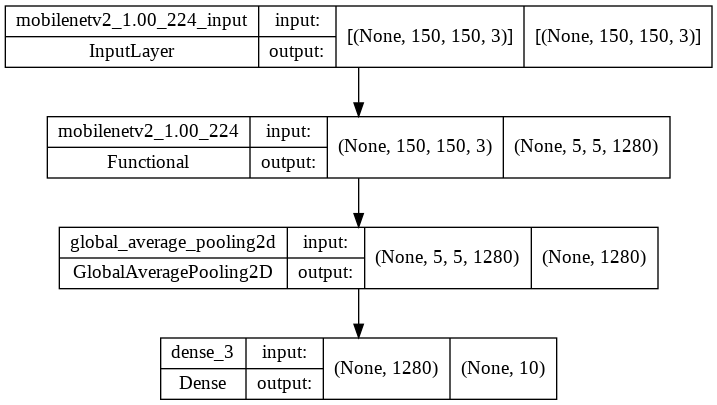

In [ ]:
plot_model(model, to_file='model2_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
import time
start=time.time()
history2 = model.fit(train_generator,epochs=10,validation_data=validation_generator)
end=time.time()
Execution_Time_Moitor.append(end-start)

Epoch 1/30
94/94 [==============================] - 39s 244ms/step - loss: 0.2230 - accuracy: 0.6702 - val_loss: 1.9562 - val_accuracy: 0.2712
Epoch 2/30
94/94 [==============================] - 20s 210ms/step - loss: 0.0416 - accuracy: 0.9757 - val_loss: 0.6526 - val_accuracy: 0.3910
Epoch 3/30
94/94 [==============================] - 20s 210ms/step - loss: 0.0096 - accuracy: 0.9963 - val_loss: 0.2424 - val_accuracy: 0.6373
Epoch 4/30
94/94 [==============================] - 20s 210ms/step - loss: 0.0025 - accuracy: 0.9997 - val_loss: 0.1598 - val_accuracy: 0.7255
Epoch 5/30
94/94 [==============================] - 20s 212ms/step - loss: 8.9278e-04 - accuracy: 1.0000 - val_loss: 0.1147 - val_accuracy: 0.8319
Epoch 6/30
94/94 [==============================] - 20s 209ms/step - loss: 0.0011 - accuracy: 0.9983 - val_loss: 0.1315 - val_accuracy: 0.8386
Epoch 7/30
94/94 [==============================] - 20s 213ms/step - loss: 6.3711e-04 - accuracy: 0.9993 - val_loss: 0.1198 - val_accuracy

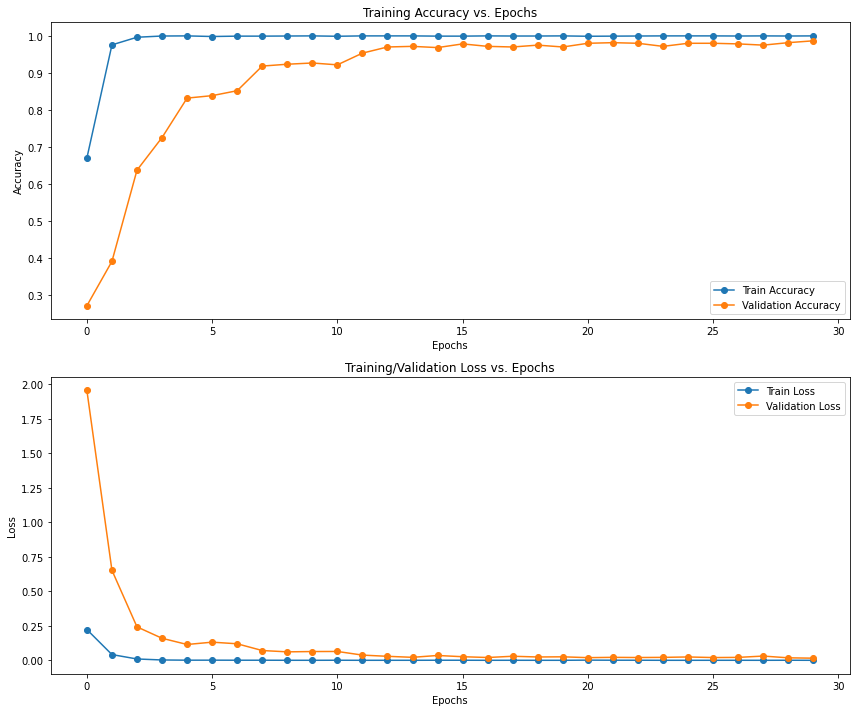

In [ ]:
def plotting(history):
    train_accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

    ax[0].set_title('Training Accuracy vs. Epochs')
    ax[0].plot(train_accuracy, 'o-', label='Train Accuracy')
    ax[0].plot(val_accuracy, 'o-', label='Validation Accuracy')
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Accuracy')
    ax[0].legend(loc='best')

    ax[1].set_title('Training/Validation Loss vs. Epochs')
    ax[1].plot(train_loss, 'o-', label='Train Loss')
    ax[1].plot(val_loss, 'o-', label='Validation Loss')
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Loss')
    ax[1].legend(loc='best')



    plt.tight_layout()
    plt.show()
plotting(history2)

In [ ]:
from keras.models import model_from_json
model_json = model.to_json()
with open("model_json.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("/content/sample_data/model2.h5")
print("Saved model to disk")


json_file = open('model_json.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("/content/sample_data/model2.h5")
print("Loaded model from disk")
#model = ...  # Get model (Sequential, Functional Model, or Model subclass)
my_model1.save('/content/sample_data/model2')

Saved model to disk
Loaded model from disk
INFO:tensorflow:Assets written to: /content/sample_data/model2/assets


In [ ]:
def score_checker(y_pred,Y_test):
    res_dict={}
    y_pred=[np.argmax(i) for i in y_pred]
    Y_tester=[np.argmax(i) for i in Y_test]
    from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
    print("\n Classification Report for Prediction_data vs Original Test_data : ", classification_report(Y_tester,y_pred))
    print("\n Confusion Matrix for Prediction_data vs Original Test_data : ",confusion_matrix(Y_tester,y_pred))
    from sklearn.metrics import accuracy_score
    accuracy=accuracy_score(Y_tester,y_pred)
    res_dict["Accuray"]=accuracy
    print("\n Accuracy Score for Prediction_data vs Original Test_data : ",accuracy)
    from sklearn.metrics import precision_score
    precision = precision_score(Y_tester, y_pred,average="weighted")
    res_dict["Precision"]=precision
    print("\n Precision Score for Prediction_data vs Original Test_data : ",precision)
    from sklearn.metrics import recall_score
    recall = recall_score(Y_tester, y_pred,average="weighted")
    res_dict["Recall"]=recall
    print("\n Recall Score for Prediction_data vs Original Test_data : ",recall)
    from sklearn.metrics import f1_score
    score = f1_score(Y_tester, y_pred,average="weighted")
    res_dict["F1 score"]=score
    print("\n F1 Score for Prediction_data vs Original Test_data : ",score)
    return res_dict
y_pred=model.predict(X_test)
plt_param=score_checker(y_pred,Y_test)

In [ ]:
def plotter(plt_param,model_name):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10,10))
    plt.title(model_name)
    import seaborn as sns
    sns.barplot(x=list(plt_param.keys()),y=list(plt_param.values()))
    plt.show()

plotter(plt_param,"Mobile Net V2 Model")

## VGG16 model

In [ ]:
from keras.applications.vgg16 import VGG16
model = VGG16()
print(model.summary())

553476096/553467096 [==============================] - 14s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                           

In [ ]:
#customising the VGG16 model towords the required input and requiered output.
from keras.models import Model
from keras.layers import Flatten, Dense
from keras.applications.vgg16 import VGG16
num_classes=10
IMAGE_SIZE = (150, 150,3)  # we will keep the image size as (64,64). You can increase the size for better results.
vgg = VGG16(input_shape = IMAGE_SIZE, weights = 'imagenet', include_top = False)  # input_shape = (64,64,3) as required by VGG
for layer in vgg.layers:
    layer.trainable = False

x = Flatten()(vgg.output)
x = Dense(num_classes, activation = 'softmax')(x)
model = Model(inputs = vgg.input, outputs = x)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0   

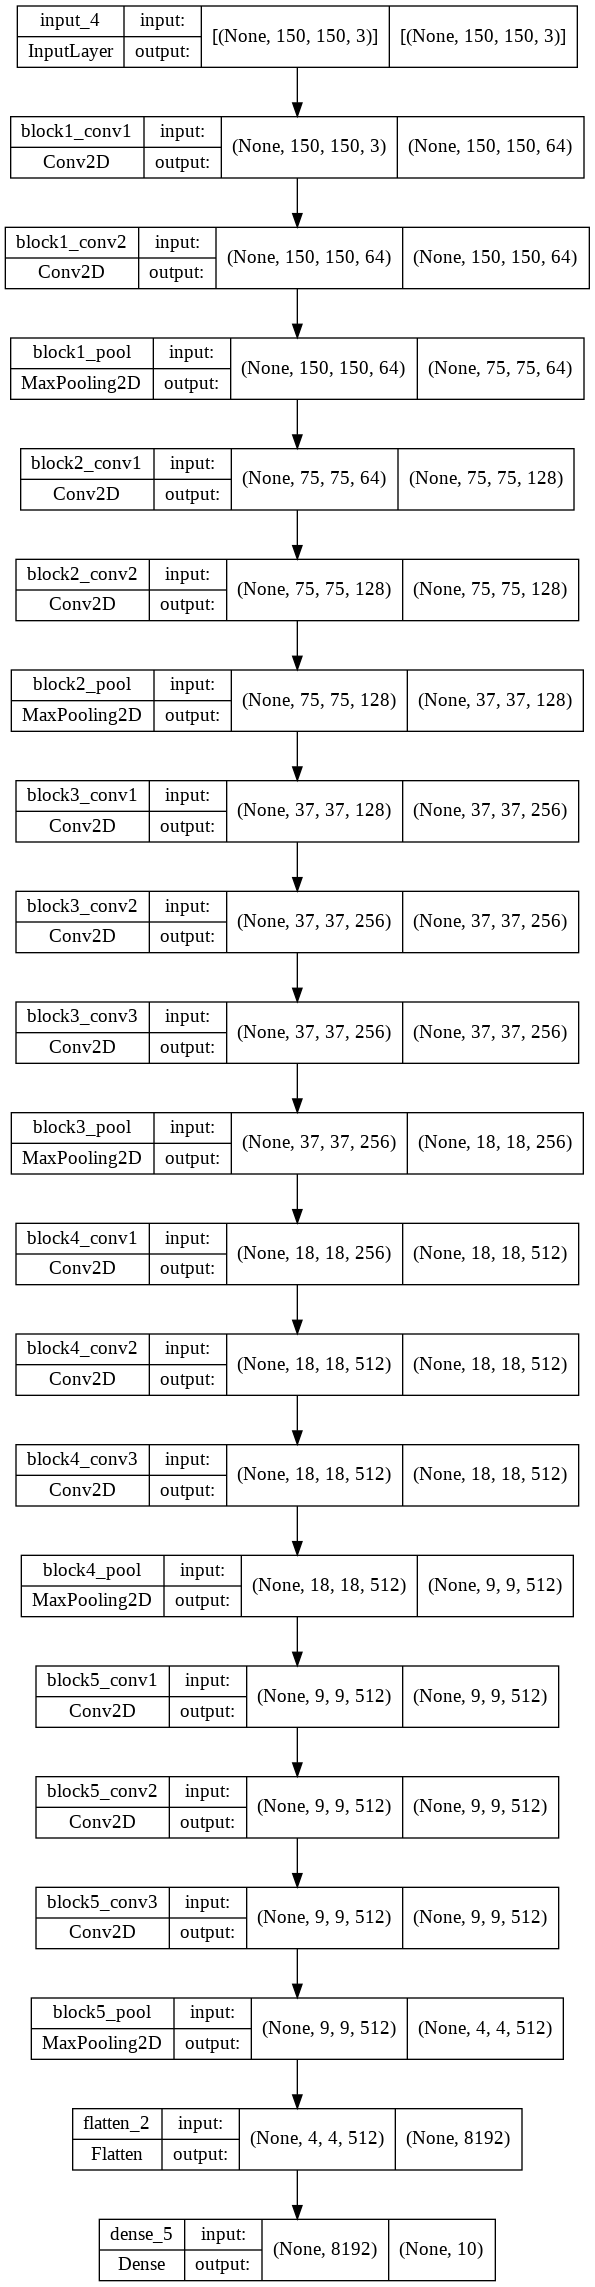

In [ ]:
plot_model(model, to_file='model3_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
# fit model
import time
start=time.time()
history3 = model.fit(X_train,Y_train,validation_data=(X_test,Y_test),
                    epochs=30)
end=time.time()
Execution_Time_Moitor.append(end-start)

Epoch 1/30
94/94 [==============================] - 28s 250ms/step - loss: 1.2716 - accuracy: 0.6306 - val_loss: 0.6084 - val_accuracy: 0.8885
Epoch 2/30
94/94 [==============================] - 19s 201ms/step - loss: 0.3821 - accuracy: 0.9354 - val_loss: 0.3365 - val_accuracy: 0.9368
Epoch 3/30
94/94 [==============================] - 19s 200ms/step - loss: 0.2098 - accuracy: 0.9681 - val_loss: 0.2368 - val_accuracy: 0.9534
Epoch 4/30
94/94 [==============================] - 19s 200ms/step - loss: 0.1391 - accuracy: 0.9860 - val_loss: 0.2027 - val_accuracy: 0.9617
Epoch 5/30
94/94 [==============================] - 19s 198ms/step - loss: 0.0932 - accuracy: 0.9947 - val_loss: 0.1584 - val_accuracy: 0.9700
Epoch 6/30
94/94 [==============================] - 18s 194ms/step - loss: 0.0699 - accuracy: 0.9973 - val_loss: 0.1392 - val_accuracy: 0.9651
Epoch 7/30
94/94 [==============================] - 18s 195ms/step - loss: 0.0517 - accuracy: 0.9990 - val_loss: 0.1236 - val_accuracy: 0.9750

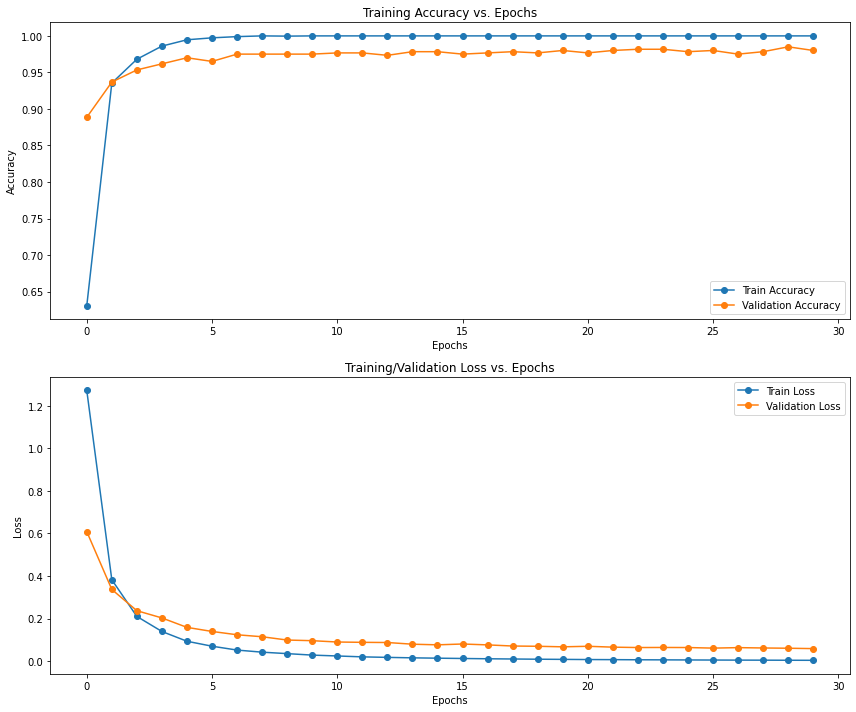

In [ ]:
def plotting(history):
    train_accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

    ax[0].set_title('Training Accuracy vs. Epochs')
    ax[0].plot(train_accuracy, 'o-', label='Train Accuracy')
    ax[0].plot(val_accuracy, 'o-', label='Validation Accuracy')
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Accuracy')
    ax[0].legend(loc='best')

    ax[1].set_title('Training/Validation Loss vs. Epochs')
    ax[1].plot(train_loss, 'o-', label='Train Loss')
    ax[1].plot(val_loss, 'o-', label='Validation Loss')
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Loss')
    ax[1].legend(loc='best')



    plt.tight_layout()
    plt.show()
plotting(history3)

In [ ]:
def score_checker(y_pred,Y_test):
    res_dict={}
    y_pred=[np.argmax(i) for i in y_pred]
    Y_tester=[np.argmax(i) for i in Y_test]
    from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
    print("\n Classification Report for Prediction_data vs Original Test_data : ", classification_report(Y_tester,y_pred))
    print("\n Confusion Matrix for Prediction_data vs Original Test_data : ",confusion_matrix(Y_tester,y_pred))
    from sklearn.metrics import accuracy_score
    accuracy=accuracy_score(Y_tester,y_pred)
    res_dict["Accuray"]=accuracy
    print("\n Accuracy Score for Prediction_data vs Original Test_data : ",accuracy)
    from sklearn.metrics import precision_score
    precision = precision_score(Y_tester, y_pred,average="weighted")
    res_dict["Precision"]=precision
    print("\n Precision Score for Prediction_data vs Original Test_data : ",precision)
    from sklearn.metrics import recall_score
    recall = recall_score(Y_tester, y_pred,average="weighted")
    res_dict["Recall"]=recall
    print("\n Recall Score for Prediction_data vs Original Test_data : ",recall)
    from sklearn.metrics import f1_score
    score = f1_score(Y_tester, y_pred,average="weighted")
    res_dict["F1 score"]=score
    print("\n F1 Score for Prediction_data vs Original Test_data : ",score)
    return res_dict
y_pred=model.predict(X_test)
plt_param=score_checker(y_pred,Y_test)


 Classification Report for Prediction_data vs Original Test_data :                precision    recall  f1-score   support

           0       1.00      0.96      0.98        57
           1       1.00      1.00      1.00        68
           2       1.00      1.00      1.00        65
           3       0.97      1.00      0.98        64
           4       0.95      0.93      0.94        59
           5       0.98      1.00      0.99        59
           6       1.00      0.96      0.98        56
           7       0.98      1.00      0.99        45
           8       0.95      0.96      0.96        57
           9       0.97      0.97      0.97        71

    accuracy                           0.98       601
   macro avg       0.98      0.98      0.98       601
weighted avg       0.98      0.98      0.98       601


 Confusion Matrix for Prediction_data vs Original Test_data :  [[55  0  0  0  1  0  0  0  0  1]
 [ 0 68  0  0  0  0  0  0  0  0]
 [ 0  0 65  0  0  0  0  0  0  0]
 [ 0  0  

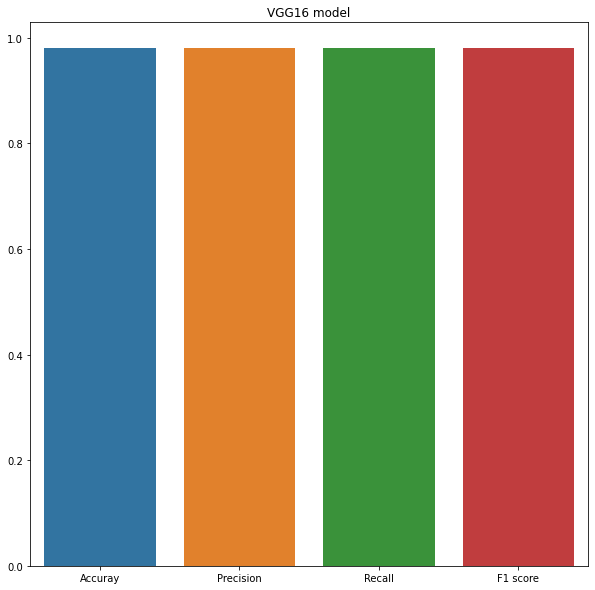

In [ ]:
def plotter(plt_param,model_name):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10,10))
    plt.title(model_name)
    import seaborn as sns
    sns.barplot(x=list(plt_param.keys()),y=list(plt_param.values()))
    plt.show()

plotter(plt_param,"VGG16 model")


In [ ]:
Execution_Time_Moitor

[2004.2797281742096, 637.8039889335632, 564.9352290630341]

#Get Effiecient net

In [ ]:
from sklearn.metrics import classification_report
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.efficientnet import EfficientNetB7
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Input, Dense, Flatten, GlobalAveragePooling2D, Conv2D , MaxPool2D  , Dropout , BatchNormalization
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing import image
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam, Adamax
import sklearn

In [ ]:
def get_efficient_net(no_of_classes):
  efficientnet = EfficientNetB7(input_shape=(150, 150, 3),
                                weights='imagenet',
                                include_top=False)
  efficientnet.trainable = False
  x = GlobalAveragePooling2D()(efficientnet.output)
  x = Flatten()(x)
  x = Dense(128, activation='relu')(x)
  x = Dense(64, activation='relu')(x)
  y = Dense(10, activation='softmax')(x)

  model_efficientnet = Model(inputs=efficientnet.input, outputs=y)
  model_efficientnet.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
  )
  return model_efficientnet

In [ ]:
model_efficientnet = get_efficient_net(10)
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
history = model_efficientnet.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,
    callbacks=[early_stopping]
    )
#evaluation_plot(lung_history)
#roc_plot(lung_test_data.classes, y_pred)
#pr_plot(lung_test_data.classes, y_pred)

#print(classification_report(lung_test_data.classes, y_pred))

Epoch 1/10
140/140 [==============================] - 206s 1s/step - loss: 2.3238 - accuracy: 0.1059 - val_loss: 2.3057 - val_accuracy: 0.1035
Epoch 2/10
140/140 [==============================] - 169s 1s/step - loss: 2.3089 - accuracy: 0.1043 - val_loss: 2.3146 - val_accuracy: 0.1021
Epoch 3/10
140/140 [==============================] - 161s 1s/step - loss: 2.3058 - accuracy: 0.1016 - val_loss: 2.3028 - val_accuracy: 0.1118
Epoch 4/10
140/140 [==============================] - 158s 1s/step - loss: 2.3021 - accuracy: 0.1050 - val_loss: 2.3007 - val_accuracy: 0.1118
Epoch 5/10
140/140 [==============================] - 159s 1s/step - loss: 2.3006 - accuracy: 0.1118 - val_loss: 2.3001 - val_accuracy: 0.1118
Epoch 6/10
140/140 [==============================] - 157s 1s/step - loss: 2.3003 - accuracy: 0.1117 - val_loss: 2.2999 - val_accuracy: 0.1118
Epoch 7/10
140/140 [==============================] - 156s 1s/step - loss: 2.3001 - accuracy: 0.1118 - val_loss: 2.2999 - val_accuracy: 0.1118

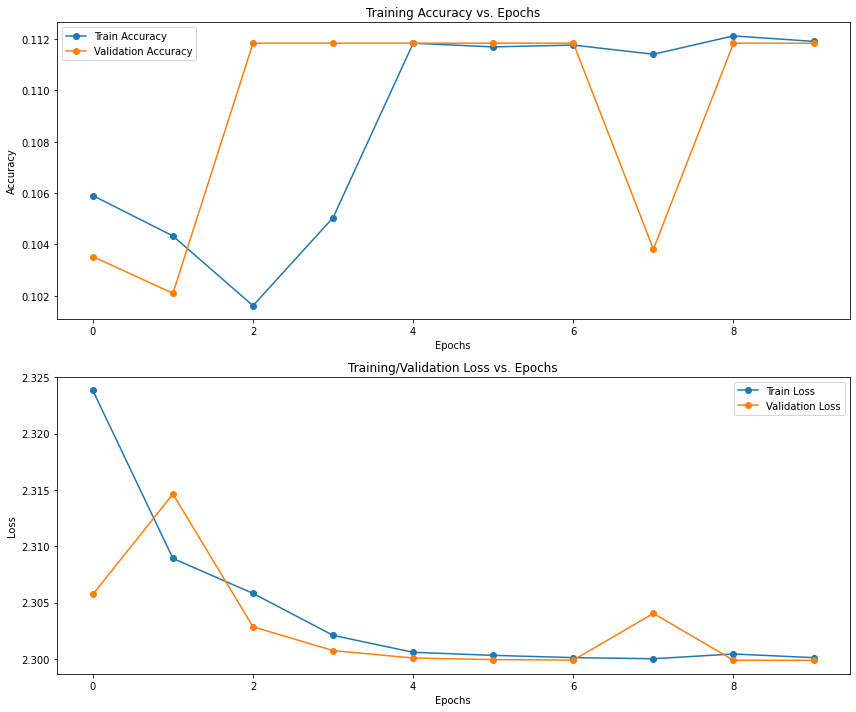

In [ ]:

def plotting(history):
    train_accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))
    #pl0ttiin the training accuracy and the loss
    ax[0].set_title('Training Accuracy vs. Epochs')
    ax[0].plot(train_accuracy, 'o-', label='Train Accuracy')
    ax[0].plot(val_accuracy, 'o-', label='Validation Accuracy')
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Accuracy')
    ax[0].legend(loc='best')

    ax[1].set_title('Training/Validation Loss vs. Epochs')
    ax[1].plot(train_loss, 'o-', label='Train Loss')
    ax[1].plot(val_loss, 'o-', label='Validation Loss')
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Loss')
    ax[1].legend(loc='best')
    plt.tight_layout()
    plt.show()
plotting(history)

#Inception Model

In [ ]:
def get_inceptionv3_net(no_of_classes):
  inceptionv3net = InceptionV3(input_shape=(X, Y, 3),
                   weights='imagenet',
                   include_top=False)
  inceptionv3net.trainable = False
  x = GlobalAveragePooling2D()(inceptionv3net.output)
  x = Flatten()(x)
  x = Dense(128, activation='relu')(x)
  x = Dense(64, activation='relu')(x)
  y = Dense(no_of_classes, activation='softmax')(x)

  model_inceptionv3net = Model(inputs=inceptionv3net.input, outputs=y)
  model_inceptionv3net.compile(
      loss='categorical_crossentropy',
      optimizer='adam',
      metrics=['accuracy']
      )
  return model_inceptionv3net

In [ ]:
inception_model=get_inceptionv3_net(10)
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
history = inception_model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,
    callbacks=[early_stopping]
    )


In [ ]:

def plotting(history):
    train_accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))
    #pl0ttiin the training accuracy and the loss
    ax[0].set_title('Training Accuracy vs. Epochs')
    ax[0].plot(train_accuracy, 'o-', label='Train Accuracy')
    ax[0].plot(val_accuracy, 'o-', label='Validation Accuracy')
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Accuracy')
    ax[0].legend(loc='best')

    ax[1].set_title('Training/Validation Loss vs. Epochs')
    ax[1].plot(train_loss, 'o-', label='Train Loss')
    ax[1].plot(val_loss, 'o-', label='Validation Loss')
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Loss')
    ax[1].legend(loc='best')
    plt.tight_layout()
    plt.show()
plotting(history)